# Module 4 - Data Preprocessing
Use Case - Bello Fashions

## Problem Statement
The data analysis team has been given the task to analyze the monthly sales by the manager. Our goal is to collect, collate, cleant and prepare the data for this purpose

## Imports

In [72]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get data from different sources into respective dataframes

In [3]:
!cp  /content/drive/MyDrive/NITW_B53_Python/db_bello_customers.db  /content/db_bello_customers.db
!cp  /content/drive/MyDrive/NITW_B53_Python/lcl_bello_sales.xlsx  /content/lcl_bello_sales.xlsx

In [4]:
belloexcel = pd.read_excel('lcl_bello_sales.xlsx')
print(belloexcel.shape)
belloexcel.head()

(100, 2)


,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [5]:
# !pip install sqlachemy
from sqlalchemy import create_engine

In [6]:
engine = create_engine("sqlite:///db_bello_customers.db")
bellodb = pd.read_sql_table('Payments', engine)
print(bellodb.shape)
bellodb.head()

(100, 6)


,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [7]:
bellocld = pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')
print(bellocld.shape)
bellocld.head()

(100, 5)


,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


## Merging data

In [ ]:
belloexcel.head()

,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [ ]:
bellodb.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [ ]:
bellocld.head()

,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


In [8]:
print(belloexcel.columns)
print(bellodb.columns)
print(bellocld.columns)

Index(['CustomerID', 'Price'], dtype='object')
Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime'],
      dtype='object')
Index(['CustomerID', 'ProductType', 'Rating', 'Total_Ratings', 'PaymentMode'], dtype='object')


In [9]:
bellocld.drop('PaymentMode', axis=1, inplace=True)
bellodb.drop('CustomerID', axis=1, inplace=True)
bellocld.drop('CustomerID', axis=1, inplace=True)
belloexcel.shape, bellodb.shape, bellocld.shape

((100, 2), (100, 5), (100, 3))

In [10]:
data = pd.concat([belloexcel, bellocld, bellodb], axis=1)
print(data.shape)
data.head()

(100, 10)


,CustomerID,Price,ProductType,Rating,Total_Ratings,Date,PaymentMode,ShippingMode,Gender,ShippingTime
0,10471,₹ 675036.2138626401,coates,1 start,8736,16/08/20,Creditcard,Economy,Female,17.0
1,10472,"€ 2,315.53",dresses,2 star,8547,2/8/2020 0:00,Ewallet,Mail,Unspecified,12.0
2,10473,₹ 611426.29122378,NaN,2 star,9833,8/8/2020 0:00,Prepaid Card,Mail,None,10.0
3,10474,₹ 210869.48083470002,dresses,2star,7591,None,Directdeposit,Normal,Female,2133.0
4,10475,₹ 679422.2811434,pantas,1 start,5131,24/08/20,None,Economy,Male,2133.0


In [ ]:
datanew = data[['Date','CustomerID', 'Price']]
print(datanew.shape)
datanew.head()

(100, 3)


,Date,CustomerID,Price
0,16/08/20,10471,₹ 675036.2138626401
1,2/8/2020 0:00,10472,"€ 2,315.53"
2,8/8/2020 0:00,10473,₹ 611426.29122378
3,None,10474,₹ 210869.48083470002
4,24/08/20,10475,₹ 679422.2811434


In [ ]:
data.columns

Index(['CustomerID', 'Price', 'ProductType', 'Rating', 'Total_Ratings', 'Date',
       'PaymentMode', 'ShippingMode', 'Gender', 'ShippingTime'],
      dtype='object')

In [11]:
data = data[['Date','CustomerID', 'PaymentMode' , 'ShippingMode', 'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings', 'Gender']]
print(data.shape)
data.head()

(100, 10)


,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Creditcard,Economy,17.0,₹ 675036.2138626401,coates,1 start,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,NaN,2 star,9833,None
3,None,10474,Directdeposit,Normal,2133.0,₹ 210869.48083470002,dresses,2star,7591,Female
4,24/08/20,10475,None,Economy,2133.0,₹ 679422.2811434,pantas,1 start,5131,Male


In [ ]:
# print(data.columns)
# col1 = input("enter the first column you want")
# col2 = input("enter the second column you want")
# mycollist = [col1, col2]
# data = data[mycollist]

In [ ]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Creditcard,Economy,17.0,₹ 675036.2138626401,coates,1 start,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,NaN,2 star,9833,None
3,None,10474,Directdeposit,Normal,2133.0,₹ 210869.48083470002,dresses,2star,7591,Female
4,24/08/20,10475,None,Economy,2133.0,₹ 679422.2811434,pantas,1 start,5131,Male


In [12]:
data.to_csv('mergeddata.csv', index=False)

## Duplicate Entries

In [ ]:
data.duplicated()

2

In [ ]:
data.duplicated().sum()

2

In [13]:
data[data.duplicated()]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
88,31/08/20,10558,Credit Card,Normal,11.0,₹ 234895.78095268,coates,5 star,7007,Unspecified
89,31/08/20,10558,Credit Card,Normal,11.0,₹ 234895.78095268,coates,5 star,7007,Unspecified


In [ ]:
data[data['CustomerID'] == 10558]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
87,31/08/20,10558,Credit Card,Normal,11.0,₹ 234895.78095268,coates,5 star,7007,Unspecified
88,31/08/20,10558,Credit Card,Normal,11.0,₹ 234895.78095268,coates,5 star,7007,Unspecified
89,31/08/20,10558,Credit Card,Normal,11.0,₹ 234895.78095268,coates,5 star,7007,Unspecified


In [14]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(100, 10)
(98, 10)


,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Creditcard,Economy,17.0,₹ 675036.2138626401,coates,1 start,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,NaN,2 star,9833,None
3,None,10474,Directdeposit,Normal,2133.0,₹ 210869.48083470002,dresses,2star,7591,Female
4,24/08/20,10475,None,Economy,2133.0,₹ 679422.2811434,pantas,1 start,5131,Male


## Outliers

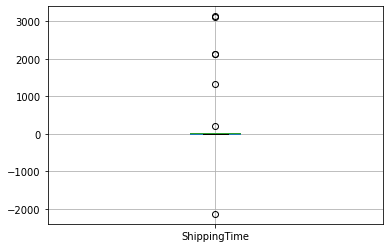

In [15]:
data.boxplot(column='ShippingTime')

In [17]:
Q1 = data['ShippingTime'].quantile(0.25)
Q3 = data['ShippingTime'].quantile(0.75)
Q2 = data['ShippingTime'].quantile(0.50)
mean = data['ShippingTime'].mean()
print(Q1, Q3, Q2, mean)

9.0 18.0 13.0 114.10309278350516


In [18]:
IQR = Q3 - Q1
LowerCutOff = Q1 - 1.5*IQR
HigherCutOff = Q3 + 1.5*IQR
print(IQR, LowerCutOff, HigherCutOff)

9.0 -4.5 31.5


In [19]:
data[data['ShippingTime'] < LowerCutOff]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
98,26/08/20,10569,Directdeposit,Economy,-2131.0,£ 4118.0053827500005,Pants,5 star,5200,Male


In [20]:
data[data['ShippingTime'] > HigherCutOff]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
3,None,10474,Directdeposit,Normal,2133.0,₹ 210869.48083470002,dresses,2star,7591,Female
4,24/08/20,10475,None,Economy,2133.0,₹ 679422.2811434,pantas,1 start,5131,Male
27,19/08/20,10498,Direct Deposit,Express,213.0,₹ 635118.07344224,Coats/Jackets,3 star,9297,Unspecified
43,14/08/20,10514,Credit Card,Express,1321.0,"€ 7,261.79",dresses,5 star,5567,Unspecified
59,17/08/20,10530,Cash,Economy,3113.0,"$8,670.69",Cardigan,4 star,6930,Female
71,20/08/20,10542,Cash,Mail,3132.0,₹ 708227.40839738,Hats,2star,9157,Male


In [21]:
data[(data['ShippingTime'] < LowerCutOff) | (data['ShippingTime'] > HigherCutOff)]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
3,None,10474,Directdeposit,Normal,2133.0,₹ 210869.48083470002,dresses,2star,7591,Female
4,24/08/20,10475,None,Economy,2133.0,₹ 679422.2811434,pantas,1 start,5131,Male
27,19/08/20,10498,Direct Deposit,Express,213.0,₹ 635118.07344224,Coats/Jackets,3 star,9297,Unspecified
43,14/08/20,10514,Credit Card,Express,1321.0,"€ 7,261.79",dresses,5 star,5567,Unspecified
59,17/08/20,10530,Cash,Economy,3113.0,"$8,670.69",Cardigan,4 star,6930,Female
71,20/08/20,10542,Cash,Mail,3132.0,₹ 708227.40839738,Hats,2star,9157,Male
98,26/08/20,10569,Directdeposit,Economy,-2131.0,£ 4118.0053827500005,Pants,5 star,5200,Male


In [22]:
print(data.shape)
data.drop([3, 4, 27, 43, 59, 71, 98], axis=0, inplace=True)
print(data.shape)

(98, 10)
(91, 10)


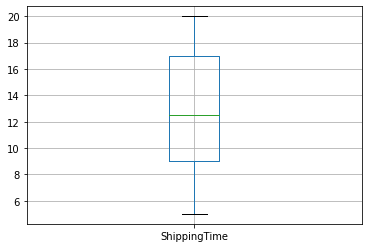

In [23]:
data.boxplot(column='ShippingTime')

## Empty Values

In [ ]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Creditcard,Economy,17.0,₹ 675036.2138626401,coates,1 start,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,NaN,2 star,9833,None
5,28/08/20,10476,Direct Deposit,Mail,20.0,NaN,Coats/Jackets,2 star,5347,Female
6,8/8/2020 0:00,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,coates,5 star,9406,Unspecified


In [ ]:
print(data.shape)
data.info()

(91, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    86 non-null     object 
 3   ShippingMode   88 non-null     object 
 4   ShippingTime   90 non-null     float64
 5   Price          90 non-null     object 
 6   ProductType    87 non-null     object 
 7   Rating         85 non-null     object 
 8   Total_Ratings  91 non-null     int64  
 9   Gender         86 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.8+ KB


In [24]:
data.ProductType = data.ProductType.astype('string')
data.PaymentMode = data.PaymentMode.astype('string')
data.ShippingMode = data.ShippingMode.astype('string')
data.Price = data.Price.astype('string')
data.Gender = data.Gender.astype('string')
data.Rating = data.Rating.astype('string')

In [ ]:
data.dtypes

Date              object
CustomerID         int64
PaymentMode       string
ShippingMode      string
ShippingTime     float64
Price             string
ProductType       string
Rating            string
Total_Ratings      int64
Gender            string
dtype: object

In [25]:
data[data.ProductType.isna()]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,<NA>,2 star,9833,<NA>
31,30/08/20,10502,Ewallet,Normal,16.0,"€ 5,242.22",<NA>,3 star,8823,Female
32,30/08/20,10503,Prepaid Card,Express,8.0,₹ 110529.79150523999,<NA>,4 star,8117,<NA>
33,24/08/20,10504,Ewallet,Normal,14.0,"€ 5,546.63",<NA>,1 start,5037,Female


In [26]:
data.ProductType.mode()

0    coates
dtype: string

In [27]:
data.ProductType.mode()[0]

'coates'

In [ ]:
data.ProductType.unique()

<StringArray>
[       'coates',      'dresses ',            <NA>, 'Coats/Jackets',
         'Jeans',        'pantas',         'Pants',      'Cardigan',
       'Dresses',   'Shirts/Tops',          'Hats']
Length: 11, dtype: string

## Impute null values

In [28]:
data.ProductType.fillna(data.ProductType.mode()[0], inplace=True)
data.ShippingMode.fillna(data.ShippingMode.mode()[0], inplace=True)
data.PaymentMode.fillna(data.PaymentMode.mode()[0], inplace=True)
data.Gender.fillna(data.Gender.mode()[0], inplace=True)
data.Rating.fillna(data.Rating.mode()[0], inplace=True)
data.ShippingTime.fillna(data.ShippingTime.mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    91 non-null     string 
 3   ShippingMode   91 non-null     string 
 4   ShippingTime   91 non-null     float64
 5   Price          90 non-null     string 
 6   ProductType    91 non-null     string 
 7   Rating         91 non-null     string 
 8   Total_Ratings  91 non-null     int64  
 9   Gender         91 non-null     string 
dtypes: float64(1), int64(2), object(1), string(6)
memory usage: 7.8+ KB


## Manipulating  values (correcting typos in the data)

In [ ]:
data.ProductType.unique()

<StringArray>
[       'coates',      'dresses ', 'Coats/Jackets',         'Jeans',
        'pantas',         'Pants',      'Cardigan',       'Dresses',
   'Shirts/Tops',          'Hats']
Length: 10, dtype: string

In [ ]:
data.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'ShippingTime',
       'Price', 'ProductType', 'Rating', 'Total_Ratings', 'Gender'],
      dtype='object')

In [ ]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Creditcard,Economy,17.0,₹ 675036.2138626401,coates,1 start,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,coates,2 star,9833,Male
5,28/08/20,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female
6,8/8/2020 0:00,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,coates,5 star,9406,Unspecified


In [29]:
productTypes = list(data.ProductType.unique())
paymentModes = list(data.PaymentMode.unique())
genders = list(data.Gender.unique())
ratings = list(data.Rating.unique())
shippingModes = list(data.ShippingMode.unique())
print(productTypes)
print(paymentModes)
print(genders)
print(ratings)
print(shippingModes)

['coates', 'dresses ', 'Coats/Jackets', 'Jeans', 'pantas', 'Pants', 'Cardigan', 'Dresses', 'Shirts/Tops', 'Hats']
['Creditcard', 'Ewallet', 'Prepaid Card', 'Direct Deposit', 'Mobile Payment', 'Cash', 'Mobile', 'Credit Card', 'Directdeposit']
['Female', 'Unspecified', 'Male']
['1 start', '2 star', '5 star', '4 star', '2star', '3 star']
['Economy', 'Mail', 'Express', 'Normal']


In [30]:
def rectifyRatings(rating):
  if rating == '1 start':
    return '1 star'
  elif rating == '2star':
    return '2 star'
  else:
    return rating

def rectifyProductTypes(prod):
  if prod == 'coates':
    return 'Coats/Jackets'
  elif prod == 'dresses ':
    return 'Dresses'
  elif prod == 'pantas':
    return 'Pants'
  else:
    return prod

def rectifyPaymentModes(mode):
  if mode == 'Creditcard':
    return 'Credit Card'
  elif mode == 'Directdeposit':
    return 'Direct Deposit'
  elif mode == 'Mobile':
    return 'Mobile Payment'
  else:
    return mode

In [31]:
data.Rating = data.Rating.apply(rectifyRatings)
data.PaymentMode = data.PaymentMode.apply(rectifyPaymentModes)
data.ProductType = data.ProductType.apply(rectifyProductTypes)


In [32]:

productTypes = list(data.ProductType.unique())
paymentModes = list(data.PaymentMode.unique())
ratings = list(data.Rating.unique())
print(productTypes)
print(paymentModes)
print(ratings)

['Coats/Jackets', 'Dresses', 'Jeans', 'Pants', 'Cardigan', 'Shirts/Tops', 'Hats']
['Credit Card', 'Ewallet', 'Prepaid Card', 'Direct Deposit', 'Mobile Payment', 'Cash']
['1 star', '2 star', '5 star', '4 star', '3 star']


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    91 non-null     object 
 3   ShippingMode   91 non-null     string 
 4   ShippingTime   91 non-null     float64
 5   Price          90 non-null     string 
 6   ProductType    91 non-null     object 
 7   Rating         91 non-null     object 
 8   Total_Ratings  91 non-null     int64  
 9   Gender         91 non-null     string 
dtypes: float64(1), int64(2), object(4), string(3)
memory usage: 7.8+ KB


## Converting date from object to datetime type

In [ ]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,16/08/20,10471,Credit Card,Economy,17.0,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female
1,2/8/2020 0:00,10472,Ewallet,Mail,12.0,"€ 2,315.53",Dresses,2 star,8547,Unspecified
2,8/8/2020 0:00,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male
5,28/08/20,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female
6,8/8/2020 0:00,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified


In [34]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,2020-08-16,10471,Credit Card,Economy,17.0,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female
1,2020-08-02,10472,Ewallet,Mail,12.0,"€ 2,315.53",Dresses,2 star,8547,Unspecified
2,2020-08-08,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male
5,2020-08-28,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female
6,2020-08-08,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     string        
 4   ShippingTime   91 non-null     float64       
 5   Price          90 non-null     string        
 6   ProductType    91 non-null     object        
 7   Rating         91 non-null     object        
 8   Total_Ratings  91 non-null     int64         
 9   Gender         91 non-null     string        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), string(3)
memory usage: 7.8+ KB


## Grouping


In [37]:
print(data.shape)
data.head()

(91, 10)


,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,2020-08-16,10471,Credit Card,Economy,17.0,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female
1,2020-08-02,10472,Ewallet,Mail,12.0,"€ 2,315.53",Dresses,2 star,8547,Unspecified
2,2020-08-08,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male
5,2020-08-28,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female
6,2020-08-08,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified


In [38]:
data.ShippingMode.unique()

<StringArray>
['Economy', 'Mail', 'Express', 'Normal']
Length: 4, dtype: string

In [39]:
data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.max, np.min])

,mean,amax,amin
ShippingMode,,,
Economy,15.176471,20.0,8.0
Express,12.310101,20.0,5.0
Mail,12.857143,20.0,5.0
Normal,11.583333,18.0,5.0


In [41]:
grouped = data.groupby('ShippingMode')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [42]:
grouped.groups

{'Economy': [0, 10, 16, 18, 19, 20, 28, 34, 35, 36, 40, 41, 54, 57, 61, 70, 83], 'Express': [8, 9, 12, 13, 21, 25, 26, 32, 38, 44, 52, 65, 67, 69, 74, 75, 76, 81, 82, 86, 91, 95], 'Mail': [1, 2, 5, 6, 7, 11, 14, 15, 17, 23, 24, 29, 37, 39, 42, 51, 56, 58, 64, 72, 73, 77, 78, 84, 90, 92, 94, 99], 'Normal': [22, 30, 31, 33, 45, 46, 47, 48, 49, 50, 53, 55, 60, 62, 63, 66, 68, 79, 80, 85, 87, 93, 96, 97]}

In [40]:
data.groupby('ShippingMode').groups

{'Economy': [0, 10, 16, 18, 19, 20, 28, 34, 35, 36, 40, 41, 54, 57, 61, 70, 83], 'Express': [8, 9, 12, 13, 21, 25, 26, 32, 38, 44, 52, 65, 67, 69, 74, 75, 76, 81, 82, 86, 91, 95], 'Mail': [1, 2, 5, 6, 7, 11, 14, 15, 17, 23, 24, 29, 37, 39, 42, 51, 56, 58, 64, 72, 73, 77, 78, 84, 90, 92, 94, 99], 'Normal': [22, 30, 31, 33, 45, 46, 47, 48, 49, 50, 53, 55, 60, 62, 63, 66, 68, 79, 80, 85, 87, 93, 96, 97]}

In [44]:
data.groupby('ShippingMode').get_group('Economy')

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,2020-08-16,10471,Credit Card,Economy,17.0,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female
10,2020-08-21,10481,Direct Deposit,Economy,17.0,"€ 3,702.54",Dresses,2 star,7750,Female
16,2020-08-17,10487,Credit Card,Economy,19.0,£ 25773831.320659,Pants,2 star,5783,Female
18,2020-08-17,10489,Direct Deposit,Economy,17.0,"€ 1,749.40",Shirts/Tops,4 star,7273,Unspecified
19,2020-08-14,10490,Direct Deposit,Economy,17.0,"$6,221.36",Shirts/Tops,1 star,9296,Female
20,2020-08-05,10491,Prepaid Card,Economy,20.0,"€ 1,514.11",Coats/Jackets,1 star,9714,Female
28,2020-08-30,10499,Cash,Economy,17.0,₹ 176647.10500702,Pants,4 star,7160,Male
34,2020-08-29,10505,Prepaid Card,Economy,15.0,"$1,024.64",Shirts/Tops,3 star,5757,Male
35,2020-08-07,10506,Ewallet,Economy,13.0,"$4,313.74",Dresses,2 star,7858,Female
36,2020-08-11,10507,Direct Deposit,Economy,19.0,£ 7236.8351195000005,Dresses,1 star,5848,Male


In [43]:
data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.max, np.min])

,mean,amax,amin
ShippingMode,,,
Economy,15.176471,20.0,8.0
Express,12.310101,20.0,5.0
Mail,12.857143,20.0,5.0
Normal,11.583333,18.0,5.0


In [45]:
data.groupby('Rating').groups

{'1 star': [0, 7, 9, 13, 14, 15, 19, 20, 26, 29, 33, 36, 38, 39, 42, 51, 52, 56, 57, 60, 65, 69, 73, 84, 85, 86, 90, 94, 99], '2 star': [1, 2, 5, 10, 16, 23, 35, 41, 47, 48, 55, 58, 61, 66, 67, 74, 80, 91, 93, 95], '3 star': [31, 34, 45, 53, 76, 77, 78, 82, 92, 97], '4 star': [8, 12, 18, 21, 22, 24, 25, 28, 30, 32, 37, 40, 44, 49, 50, 63, 68, 72, 75, 83], '5 star': [6, 11, 17, 46, 54, 62, 64, 70, 79, 81, 87, 96]}

In [47]:
data_3star = data.groupby('Rating').get_group('3 star')
print(data_3star.shape)
data_3star.head()

(10, 10)


,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
31,2020-08-30,10502,Ewallet,Normal,16.0,"€ 5,242.22",Coats/Jackets,3 star,8823,Female
34,2020-08-29,10505,Prepaid Card,Economy,15.0,"$1,024.64",Shirts/Tops,3 star,5757,Male
45,2020-08-25,10516,Direct Deposit,Normal,14.0,₹ 167727.12548098,Jeans,3 star,7033,Male
53,2020-08-26,10524,Direct Deposit,Normal,5.0,₹ 442385.73497213994,Dresses,3 star,6654,Male
76,2020-08-28,10547,Direct Deposit,Express,12.0,"$9,430.45",Hats,3 star,6040,Unspecified


In [48]:
data.groupby(['ProductType', 'Gender']).Total_Ratings.agg([np.mean, np.max, np.min])

mean  amax  amin
ProductType   Gender                              
Cardigan      Female       8524.000000  9925  6081
              Male         6313.500000  7547  5080
              Unspecified  7021.000000  7021  7021
Coats/Jackets Female       7577.000000  9714  5037
              Male         7437.200000  9833  5024
              Unspecified  7703.833333  9433  5498
Dresses       Female       8121.000000  9142  7287
              Male         7202.111111  9570  5485
              Unspecified  8319.250000  9365  6195
Hats          Female       7532.000000  7532  7532
              Male         7819.000000  8734  6594
              Unspecified  5830.000000  6040  5620
Jeans         Female       7842.000000  8399  7285
              Male         7773.666667  9410  6878
              Unspecified  8174.600000  9482  7352
Pants         Female       7048.200000  7816  5783
              Male         7443.750000  9630  6416
              Unspecified  8074.333333  8745  6943
Shirts/Tops   Female       9057.500000  9296  8819
              Male         7708.500000  9965  5757
              Unspecified  7351.000000  9015  5077

## Pivot Table

In [49]:
pd.pivot_table(data, values='ShippingTime', index = 'Date', columns='ShippingMode')

ShippingMode,Economy,Express,Mail,Normal
Date,,,,
2020-08-01,NaN,12.822222,11.0,9.000000
2020-08-02,20.0,18.000000,10.5,12.000000
2020-08-03,NaN,8.000000,20.0,NaN
2020-08-04,NaN,5.000000,NaN,12.333333
2020-08-05,20.0,NaN,NaN,10.000000
2020-08-06,NaN,14.500000,19.0,7.000000
2020-08-07,13.0,NaN,14.0,NaN
2020-08-08,NaN,13.500000,11.8,14.000000
2020-08-09,NaN,16.000000,NaN,NaN


In [51]:
pd.pivot_table(data, values='ShippingTime', index = 'ProductType', columns='ShippingMode')

ShippingMode,Economy,Express,Mail,Normal
ProductType,,,,
Cardigan,12.000000,11.000000,11.333333,NaN
Coats/Jackets,16.000000,10.571429,13.700000,11.666667
Dresses,14.500000,14.666667,14.625000,9.250000
Hats,NaN,16.000000,NaN,10.000000
Jeans,8.000000,9.500000,9.666667,14.000000
Pants,18.666667,15.911111,10.000000,13.200000
Shirts/Tops,15.200000,10.666667,11.500000,9.500000


## Filtering

In [53]:
datatmp = data[(data.ShippingTime > 6) & (data.ShippingTime < 9)]
print(data.shape)
print(datatmp.shape)
datatmp.head()

(91, 10)
(11, 10)


,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
14,2020-08-20,10485,Mobile Payment,Mail,7.0,"$9,743.11",Dresses,1 star,9030,Female
32,2020-08-30,10503,Prepaid Card,Express,8.0,₹ 110529.79150523999,Coats/Jackets,4 star,8117,Male
46,2020-08-29,10517,Credit Card,Normal,7.0,"$3,124.78",Hats,5 star,7532,Female
49,2020-08-06,10520,Ewallet,Normal,7.0,"$1,012.61",Hats,4 star,5620,Unspecified
58,2020-08-02,10529,Credit Card,Mail,8.0,£ 6029.319179500001,Coats/Jackets,2 star,5498,Unspecified


### Filtering using the filter method

In [57]:
data.groupby('ProductType').filter(lambda val: val['Total_Ratings'].mean() > 7800)

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
7,2020-08-08,10478,Direct Deposit,Mail,18.0,"$4,287.06",Jeans,1 star,8554,Unspecified
29,2020-08-02,10500,Direct Deposit,Mail,5.0,"$21,312,321.13",Jeans,1 star,9410,Male
38,2020-08-29,10509,Credit Card,Express,9.0,"$2,591.72",Jeans,1 star,7352,Unspecified
45,2020-08-25,10516,Direct Deposit,Normal,14.0,₹ 167727.12548098,Jeans,3 star,7033,Male
47,2020-08-21,10518,Credit Card,Normal,14.0,"€ 2,773.90",Jeans,2 star,7285,Female
48,2020-08-20,10519,Ewallet,Normal,18.0,₹ 159529.19686752,Jeans,2 star,7678,Unspecified
55,2020-08-05,10526,Direct Deposit,Normal,10.0,₹ 321706.90933682,Jeans,2 star,9482,Unspecified
61,2020-08-21,10532,Credit Card,Economy,8.0,"€ 4,773.37",Jeans,2 star,8399,Female
65,2020-08-31,10536,Prepaid Card,Express,10.0,"$7,072.56",Jeans,1 star,6878,Male
99,2020-08-29,10570,Credit Card,Mail,6.0,£ 6232.343745500001,Jeans,1 star,7807,Unspecified


## Transformation

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     string        
 4   ShippingTime   91 non-null     float64       
 5   Price          90 non-null     string        
 6   ProductType    91 non-null     object        
 7   Rating         91 non-null     object        
 8   Total_Ratings  91 non-null     int64         
 9   Gender         91 non-null     string        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), string(3)
memory usage: 9.9+ KB


In [60]:
data[data.Price.isna()]

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
5,2020-08-28,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female


In [61]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender
0,2020-08-16,10471,Credit Card,Economy,17.0,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female
1,2020-08-02,10472,Ewallet,Mail,12.0,"€ 2,315.53",Dresses,2 star,8547,Unspecified
2,2020-08-08,10473,Prepaid Card,Mail,10.0,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male
5,2020-08-28,10476,Direct Deposit,Mail,20.0,<NA>,Coats/Jackets,2 star,5347,Female
6,2020-08-08,10477,Direct Deposit,Mail,14.0,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified


In [62]:
def getCurrency(price):
  if pd.isna(price):
    return ''
  elif '$' in price:
    return 'US Dollar'
  elif '£' in price:
    return 'British Pound'
  elif '€' in price:
    return 'Euro'
  elif '₹' in price:
    return 'Indian Rupee'
  else:
    return ''

In [65]:
# getCurrency('₹ 611426.29122378')
# getCurrency('€ 2,315.53')
getCurrency('£ 6610.077565000001')

'British Pound'

In [66]:
data['PaidCurrency'] = data.Price.apply(getCurrency)
data[['Date', 'Price','PaidCurrency']].head(10)

,Date,Price,PaidCurrency
0,2020-08-16,₹ 675036.2138626401,Indian Rupee
1,2020-08-02,"€ 2,315.53",Euro
2,2020-08-08,₹ 611426.29122378,Indian Rupee
5,2020-08-28,<NA>,
6,2020-08-08,£ 6610.077565000001,British Pound
7,2020-08-08,"$4,287.06",US Dollar
8,2020-08-01,£ 3010.212198,British Pound
9,2020-08-16,£ 4032878.5368307503,British Pound
10,2020-08-21,"€ 3,702.54",Euro
11,2020-08-18,"€ 6,580.20",Euro


In [67]:
data['Price_USD'] = data['Price']
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)


,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,₹ 675036.2138626401
1,2020-08-02,"€ 2,315.53",Euro,"€ 2,315.53"
2,2020-08-08,₹ 611426.29122378,Indian Rupee,₹ 611426.29122378
5,2020-08-28,<NA>,,<NA>
6,2020-08-08,£ 6610.077565000001,British Pound,£ 6610.077565000001
7,2020-08-08,"$4,287.06",US Dollar,"$4,287.06"
8,2020-08-01,£ 3010.212198,British Pound,£ 3010.212198
9,2020-08-16,£ 4032878.5368307503,British Pound,£ 4032878.5368307503
10,2020-08-21,"€ 3,702.54",Euro,"€ 3,702.54"
11,2020-08-18,"€ 6,580.20",Euro,"€ 6,580.20"


In [68]:
data.Price_USD = data.Price_USD.str.replace('$', '')
data.Price_USD = data.Price_USD.str.replace('£', '')
data.Price_USD = data.Price_USD.str.replace('€', '')
data.Price_USD = data.Price_USD.str.replace('₹', '')
data.Price_USD = data.Price_USD.str.replace(',', '')
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,675036.2138626401
1,2020-08-02,"€ 2,315.53",Euro,2315.53
2,2020-08-08,₹ 611426.29122378,Indian Rupee,611426.29122378
5,2020-08-28,<NA>,,<NA>
6,2020-08-08,£ 6610.077565000001,British Pound,6610.077565000001
7,2020-08-08,"$4,287.06",US Dollar,4287.06
8,2020-08-01,£ 3010.212198,British Pound,3010.212198
9,2020-08-16,£ 4032878.5368307503,British Pound,4032878.5368307503
10,2020-08-21,"€ 3,702.54",Euro,3702.54
11,2020-08-18,"€ 6,580.20",Euro,6580.20


In [69]:

data.Price_USD.fillna('0', inplace=True)
data.Price_USD = data.Price_USD.astype('float')
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)

,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,6.750362e+05
1,2020-08-02,"€ 2,315.53",Euro,2.315530e+03
2,2020-08-08,₹ 611426.29122378,Indian Rupee,6.114263e+05
5,2020-08-28,<NA>,,0.000000e+00
6,2020-08-08,£ 6610.077565000001,British Pound,6.610078e+03
7,2020-08-08,"$4,287.06",US Dollar,4.287060e+03
8,2020-08-01,£ 3010.212198,British Pound,3.010212e+03
9,2020-08-16,£ 4032878.5368307503,British Pound,4.032879e+06
10,2020-08-21,"€ 3,702.54",Euro,3.702540e+03
11,2020-08-18,"€ 6,580.20",Euro,6.580200e+03


In [71]:
pd.set_option('display.float_format',  '{:,.2f}'.format)
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)

,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,"675,036.21"
1,2020-08-02,"€ 2,315.53",Euro,"2,315.53"
2,2020-08-08,₹ 611426.29122378,Indian Rupee,"611,426.29"
5,2020-08-28,<NA>,,0.00
6,2020-08-08,£ 6610.077565000001,British Pound,"6,610.08"
7,2020-08-08,"$4,287.06",US Dollar,"4,287.06"
8,2020-08-01,£ 3010.212198,British Pound,"3,010.21"
9,2020-08-16,£ 4032878.5368307503,British Pound,"4,032,878.54"
10,2020-08-21,"€ 3,702.54",Euro,"3,702.54"
11,2020-08-18,"€ 6,580.20",Euro,"6,580.20"


In [73]:
currency = ['British Pound', 'Euro', 'Indian Rupee']
erate = [ 1.1, 1.05, round(1/81.35, 3)]
print(currency)
print(erate)

['British Pound', 'Euro', 'Indian Rupee']
[1.1, 1.05, 0.012]


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     string        
 4   ShippingTime   91 non-null     float64       
 5   Price          90 non-null     string        
 6   ProductType    91 non-null     object        
 7   Rating         91 non-null     object        
 8   Total_Ratings  91 non-null     int64         
 9   Gender         91 non-null     string        
 10  PaidCurrency   91 non-null     object        
 11  Price_USD      91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), string(3)
memory usage: 11.3+ KB


In [75]:
data.PaidCurrency = data.PaidCurrency.astype('string')
data.reset_index(inplace=True, drop=True)
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)

,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,"675,036.21"
1,2020-08-02,"€ 2,315.53",Euro,"2,315.53"
2,2020-08-08,₹ 611426.29122378,Indian Rupee,"611,426.29"
3,2020-08-28,<NA>,,0.00
4,2020-08-08,£ 6610.077565000001,British Pound,"6,610.08"
5,2020-08-08,"$4,287.06",US Dollar,"4,287.06"
6,2020-08-01,£ 3010.212198,British Pound,"3,010.21"
7,2020-08-16,£ 4032878.5368307503,British Pound,"4,032,878.54"
8,2020-08-21,"€ 3,702.54",Euro,"3,702.54"
9,2020-08-18,"€ 6,580.20",Euro,"6,580.20"


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     string        
 4   ShippingTime   91 non-null     float64       
 5   Price          90 non-null     string        
 6   ProductType    91 non-null     object        
 7   Rating         91 non-null     object        
 8   Total_Ratings  91 non-null     int64         
 9   Gender         91 non-null     string        
 10  PaidCurrency   91 non-null     string        
 11  Price_USD      91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3), string(4)
memory usage: 8.7+ KB


In [ ]:
currency = ['British Pound', 'Euro', 'Indian Rupee']
erate = [ 1.1, 1.05, round(1/81.35, 3)]

In [80]:
recs = data.shape[0]
price_dollars = []
for i in range(recs):
  if data.PaidCurrency[i] == 'Euro':
    price_dollars.append(round(data.Price_USD[i] * erate[1],2))
  elif data.PaidCurrency[i] == 'British Pound':
    price_dollars.append(round(data.Price_USD[i] * erate[0],2))
  elif data.PaidCurrency[i] == 'Indian Rupee':
    price_dollars.append(round(data.Price_USD[i] * erate[2],2))
  else:
    price_dollars.append(round(data.Price_USD[i],2))

print(len(price_dollars))
print(price_dollars)

91
[8100.43, 2431.31, 7337.12, 0.0, 7271.09, 4287.06, 3311.23, 4436166.39, 3887.67, 6909.21, 6756.94, 3148.65, 9743.11, 2409.73, 28351214.45, 1991.18, 1836.87, 6221.36, 1589.82, 4240.35, 7617.7, 7162.72, 3536.96, 5020.65, 6104.03, 2119.77, 21312321.13, 6972.4, 5504.33, 1326.36, 5823.96, 1024.64, 4313.74, 7960.52, 1228.43, 2591.72, 2608.65, 6174.18, 6517.56, 6930.87, 1586.75, 2012.73, 3124.78, 2912.6, 1914.35, 1012.61, 3906.06, 1813.71, 8122.7, 5308.63, 1664.35, 3860.48, 6374.54, 4531.15, 6632.25, 5876.91, 5012.04, 6961.93, 5327.36, 5096.11, 7072.56, 5836.06, 3702.26, 1842.56, 2661.99, 4711.38, 6425.44, 5382.49, 7103.75, 3552.8, 9430.45, 1421.89, 4466.46, 2904.03, 6399.05, 4965.25, 4661.52, 2040.43, 2528.42, 9962.44, 5503.61, 2818.75, 7891.05, 4526.35, 7410.81, 3906.97, 8094.3, 1262.93, 1531.87, 6924.94, 6855.58]


In [81]:
data.Price_USD = price_dollars
data[['Date', 'Price','PaidCurrency','Price_USD']].head(10)

,Date,Price,PaidCurrency,Price_USD
0,2020-08-16,₹ 675036.2138626401,Indian Rupee,"8,100.43"
1,2020-08-02,"€ 2,315.53",Euro,"2,431.31"
2,2020-08-08,₹ 611426.29122378,Indian Rupee,"7,337.12"
3,2020-08-28,<NA>,,0.00
4,2020-08-08,£ 6610.077565000001,British Pound,"7,271.09"
5,2020-08-08,"$4,287.06",US Dollar,"4,287.06"
6,2020-08-01,£ 3010.212198,British Pound,"3,311.23"
7,2020-08-16,£ 4032878.5368307503,British Pound,"4,436,166.39"
8,2020-08-21,"€ 3,702.54",Euro,"3,887.67"
9,2020-08-18,"€ 6,580.20",Euro,"6,909.21"


In [82]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender,PaidCurrency,Price_USD
0,2020-08-16,10471,Credit Card,Economy,17.00,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female,Indian Rupee,"8,100.43"
1,2020-08-02,10472,Ewallet,Mail,12.00,"€ 2,315.53",Dresses,2 star,8547,Unspecified,Euro,"2,431.31"
2,2020-08-08,10473,Prepaid Card,Mail,10.00,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male,Indian Rupee,"7,337.12"
3,2020-08-28,10476,Direct Deposit,Mail,20.00,<NA>,Coats/Jackets,2 star,5347,Female,,0.00
4,2020-08-08,10477,Direct Deposit,Mail,14.00,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified,British Pound,"7,271.09"


## Encoding

In [83]:
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender,PaidCurrency,Price_USD
0,2020-08-16,10471,Credit Card,Economy,17.00,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female,Indian Rupee,"8,100.43"
1,2020-08-02,10472,Ewallet,Mail,12.00,"€ 2,315.53",Dresses,2 star,8547,Unspecified,Euro,"2,431.31"
2,2020-08-08,10473,Prepaid Card,Mail,10.00,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male,Indian Rupee,"7,337.12"
3,2020-08-28,10476,Direct Deposit,Mail,20.00,<NA>,Coats/Jackets,2 star,5347,Female,,0.00
4,2020-08-08,10477,Direct Deposit,Mail,14.00,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified,British Pound,"7,271.09"


### Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
encoded_data = data.copy()
lbe = LabelEncoder()
encoded_data['ProductType_lbl'] = lbe.fit_transform(encoded_data.ProductType)
encoded_data[['ProductType', 'ProductType_lbl']]

,ProductType,ProductType_lbl
0,Coats/Jackets,1
1,Dresses,2
2,Coats/Jackets,1
3,Coats/Jackets,1
4,Coats/Jackets,1
...,...,...
86,Coats/Jackets,1
87,Coats/Jackets,1
88,Coats/Jackets,1
89,Pants,5


In [86]:
encoded_data.ProductType_lbl.unique()

array([1, 2, 4, 5, 0, 6, 3])

### One Hot Encoding

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [88]:
ohe.fit_transform(encoded_data[['ProductType_lbl']]).toarray()

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [89]:
ptOheDf = pd.DataFrame(ohe.fit_transform(encoded_data[['ProductType_lbl']]).toarray())
ptOheDf.head()

,0,1,2,3,4,5,6
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
encoded_data = encoded_data.join(ptOheDf)


In [94]:
encoded_data[['Date', 'ProductType', 'Price_USD','ProductType_lbl', 0,1,2,3,4,5,6]].head()

,Date,ProductType,Price_USD,ProductType_lbl,0,1,2,3,4,5,6
0,2020-08-16,Coats/Jackets,"8,100.43",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,2020-08-02,Dresses,"2,431.31",2,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,2020-08-08,Coats/Jackets,"7,337.12",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,2020-08-28,Coats/Jackets,0.00,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,2020-08-08,Coats/Jackets,"7,271.09",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [93]:
encoded_data.head()

,Date,CustomerID,PaymentMode,ShippingMode,ShippingTime,Price,ProductType,Rating,Total_Ratings,Gender,PaidCurrency,Price_USD,ProductType_lbl,0,1,2,3,4,5,6
0,2020-08-16,10471,Credit Card,Economy,17.00,₹ 675036.2138626401,Coats/Jackets,1 star,8736,Female,Indian Rupee,"8,100.43",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,2020-08-02,10472,Ewallet,Mail,12.00,"€ 2,315.53",Dresses,2 star,8547,Unspecified,Euro,"2,431.31",2,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,2020-08-08,10473,Prepaid Card,Mail,10.00,₹ 611426.29122378,Coats/Jackets,2 star,9833,Male,Indian Rupee,"7,337.12",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,2020-08-28,10476,Direct Deposit,Mail,20.00,<NA>,Coats/Jackets,2 star,5347,Female,,0.00,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,2020-08-08,10477,Direct Deposit,Mail,14.00,£ 6610.077565000001,Coats/Jackets,5 star,9406,Unspecified,British Pound,"7,271.09",1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
